In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/wine.xlsx')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.columns = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols','Flavonoids',
'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


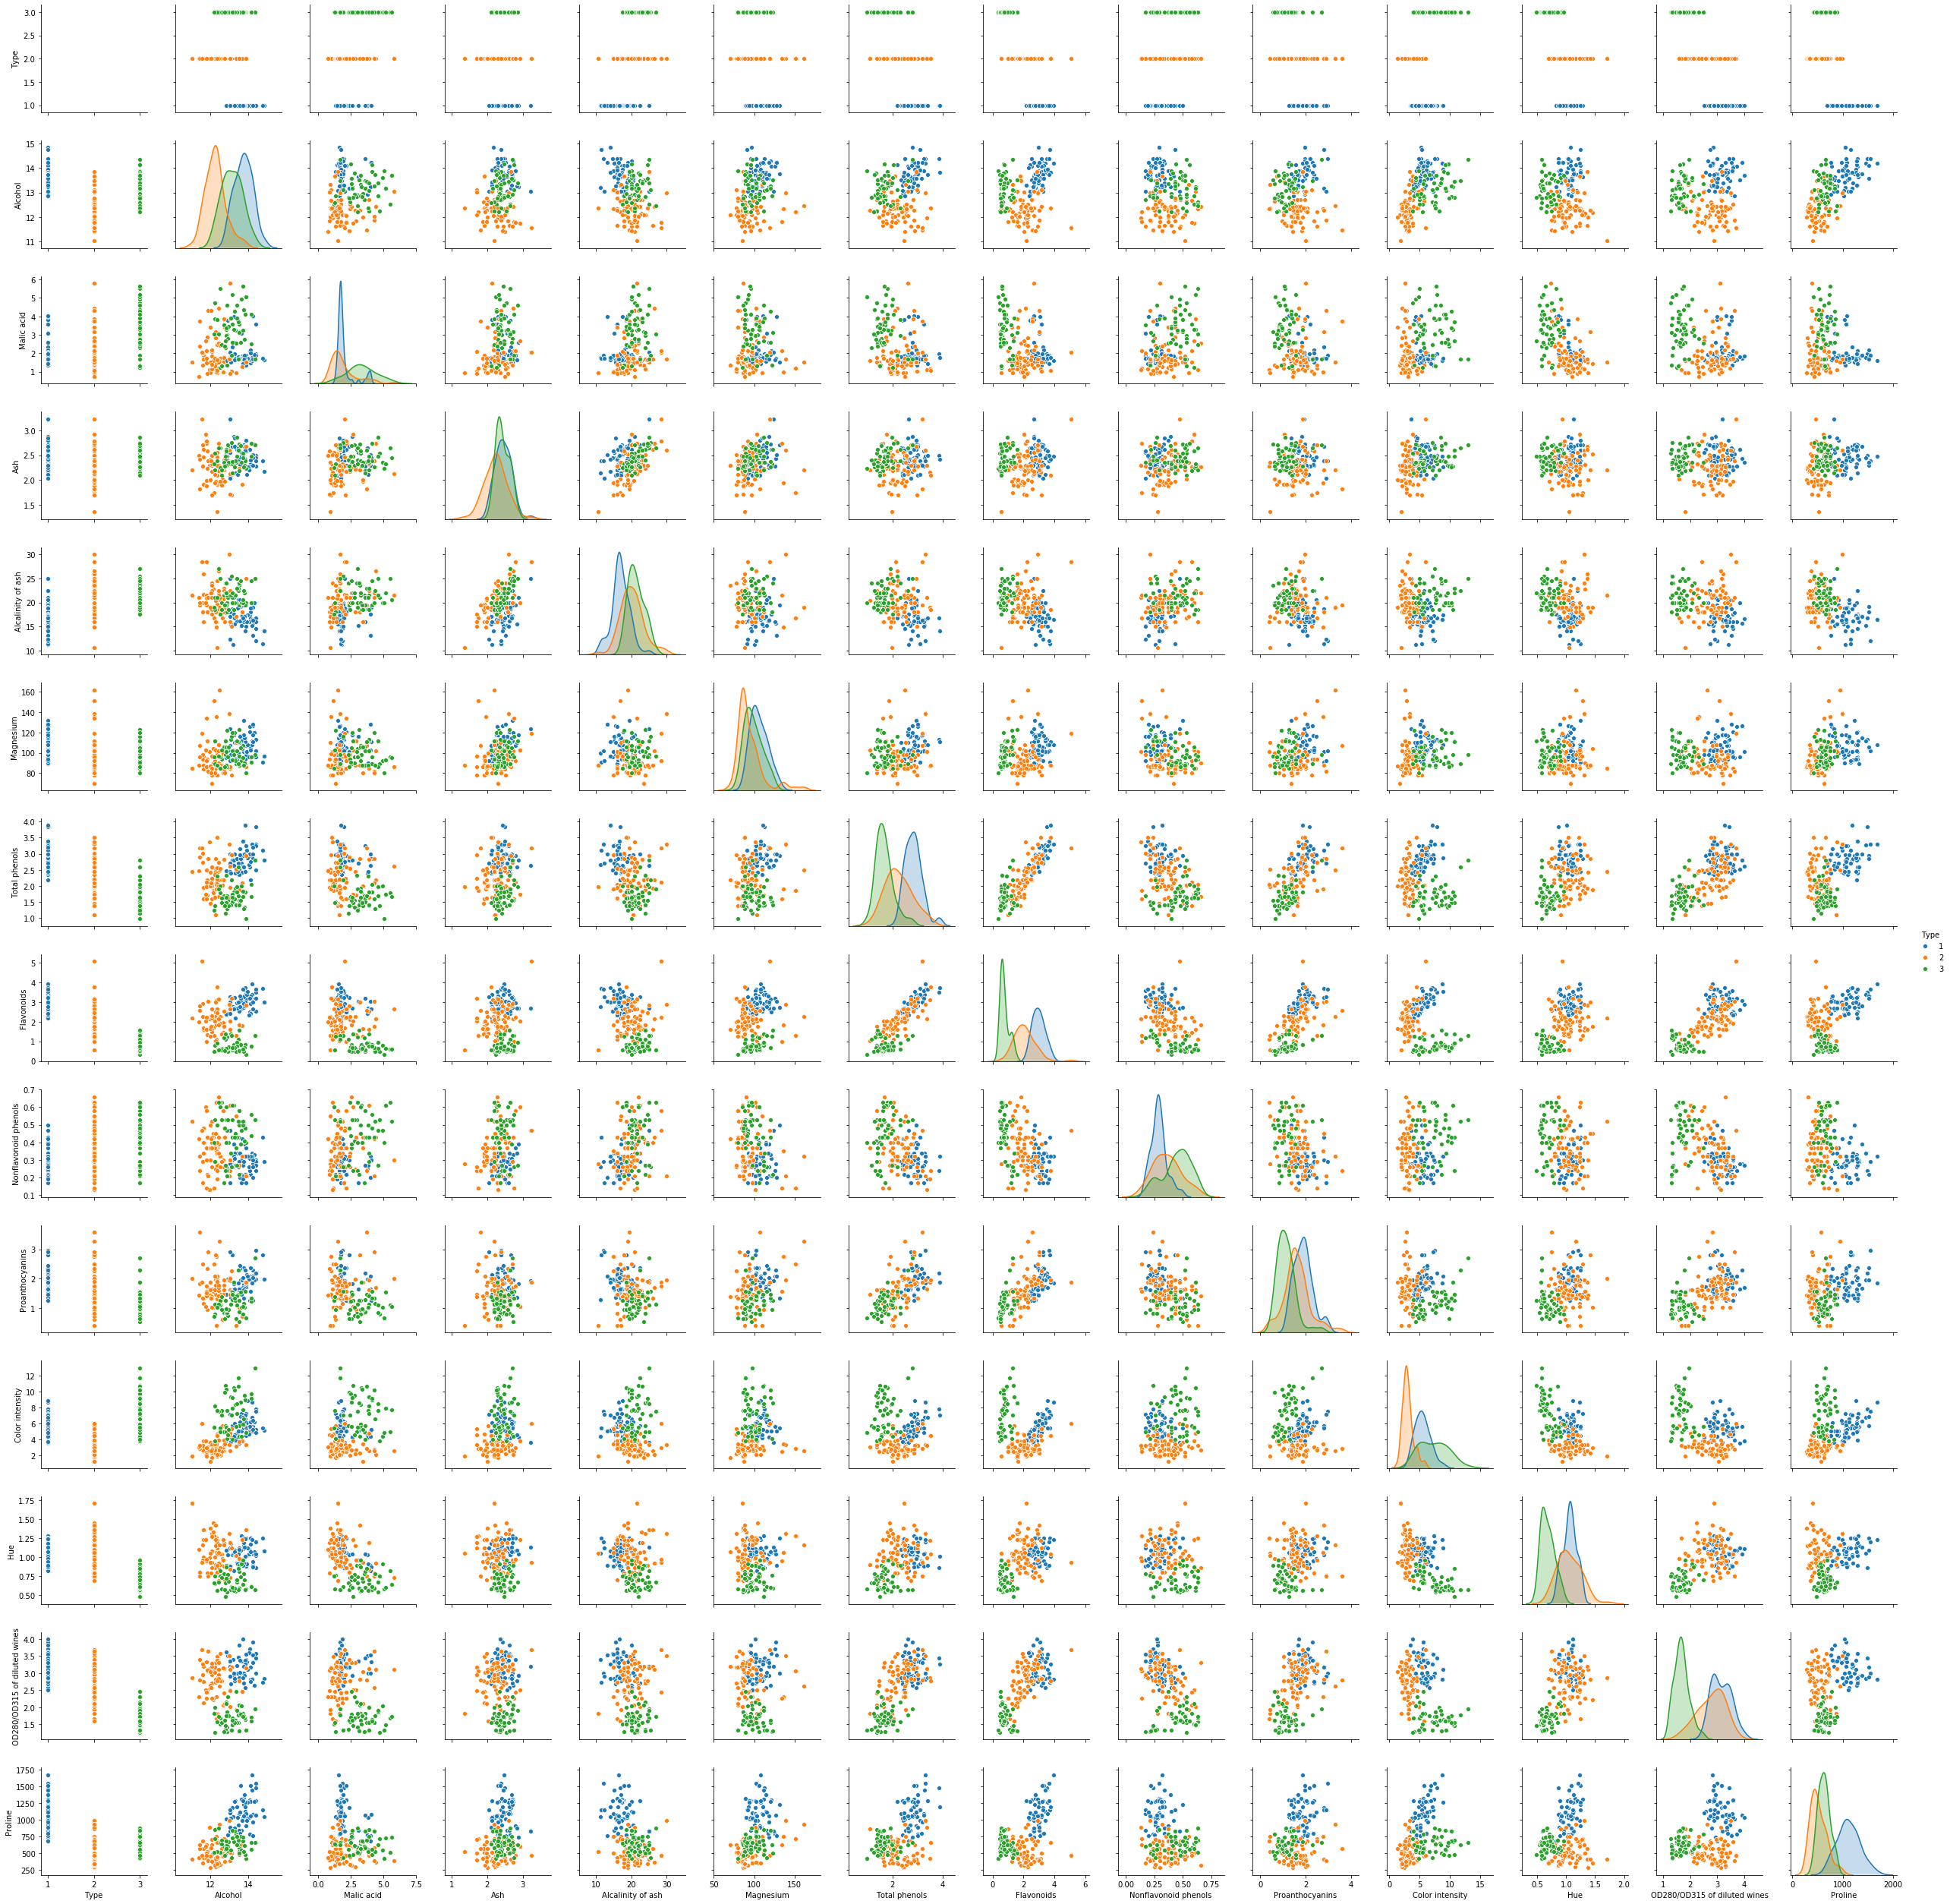

In [9]:
sns.pairplot(df, hue="Type")

In [11]:

#Feature-matriisi
X = df.drop('Type', axis=1)
y = df['Type']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=5)

In [13]:
from sklearn.linear_model import LogisticRegression #testataan ohjattua oppimisalgoritmia

#Mallin sovitus:
malli = LogisticRegression()
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_malli)

0.9849624060150376

In [15]:
accuracy_score(y_test, y_test_malli)

0.9111111111111111

In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[39  1  0]
 [ 0 56  1]
 [ 0  0 36]]


In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_malli))

[[18  1  0]
 [ 1 12  1]
 [ 0  1 11]]


In [20]:
corr = df.corr()
print(corr.Type)

Type                            1.000000
Alcohol                        -0.328222
Malic acid                      0.437776
Ash                            -0.049643
Alcalinity of ash               0.517859
Magnesium                      -0.209179
Total phenols                  -0.719163
Flavonoids                     -0.847498
Nonflavonoid phenols            0.489109
Proanthocyanins                -0.499130
Color intensity                 0.265668
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Type, dtype: float64


In [21]:


#Gaussian naive bayes -mallin tuonti:
from sklearn.cluster import KMeans

#Mallin sovitus:
malli = KMeans(n_clusters=3)
malli.fit(X)

#Ryhmien keskukset:
malli.cluster_centers_



array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [22]:


#Ryhmiin kuulumiset:
X['K'] = malli.predict(X)
pd.crosstab(X['K'], 'lkm')



col_0,lkm
K,
0,69
1,47
2,62


In [23]:


#Tunnuslukuja ryhmittäin:
X.groupby('K').describe().T



K                                            0            1           2
Alcohol                      count   69.000000    47.000000   62.000000
                             mean    12.516667    13.804468   12.929839
                             std      0.666996     0.464331    0.697101
                             min     11.030000    12.850000   11.450000
                             25%     12.070000    13.535000   12.370000
                             50%     12.420000    13.820000   13.005000
                             75%     12.850000    14.155000   13.437500
                             max     14.130000    14.830000   14.340000
Malic acid                   count   69.000000    47.000000   62.000000
                             mean     2.494203     1.883404    2.504032
                             std      1.262772     0.547874    1.184280
                             min      0.740000     1.350000    0.940000
                             25%      1.510000     1.655000    1.615000
                             50%      2.130000     1.730000    2.260000
                             75%      3.430000     1.880000    3.352500
                             max      5.800000     4.040000    5.650000
Ash                          count   69.000000    47.000000   62.000000
                             mean     2.288551     2.426170    2.408065
                             std      0.300633     0.190384    0.280952
                             min      1.360000     2.040000    1.700000
                             25%      2.160000     2.290000    2.265000
                             50%      2.280000     2.430000    2.365000
                             75%      2.460000     2.600000    2.590000
                             max      3.230000     2.720000    3.220000
Alcalinity of ash            count   69.000000    47.000000   62.000000
                             mean    20.823188    17.023404   19.890323
                             std      3.166281     2.999001    2.746247
                             min     10.600000    11.200000   13.200000
                             25%     19.000000    16.000000   18.200000
                             50%     21.000000    16.800000   20.000000
...                                        ...          ...         ...
Color intensity              std      2.182074     1.297969    2.696876
                             min      1.280000     3.350000    1.740000
                             25%      2.600000     4.850000    3.535000
                             50%      3.250000     5.640000    4.800000
                             75%      5.000000     6.490000    7.637500
                             max     10.800000     8.900000   13.000000
Hue                          count   69.000000    47.000000   62.000000
                             mean     0.941159     1.078298    0.883968
                             std      0.252543     0.118401    0.229971
                             min      0.480000     0.860000    0.540000
                             25%      0.780000     1.015000    0.685000
                             50%      0.920000     1.070000    0.885000
                             75%      1.100000     1.160000    1.055000
                             max      1.710000     1.310000    1.310000
OD280/OD315 of diluted wines count   69.000000    47.000000   62.000000
                             mean     2.490725     3.114043    2.365484
                             std      0.673986     0.358273    0.766090
                             min      1.300000     2.510000    1.270000
                             25%      2.010000     2.850000    1.687500
                             50%      2.570000     3.000000    2.280000
                             75%      3.100000     3.385000    3.115000
                             max      3.690000     4.000000    3.820000
Proline                      count   69.000000    47.000000   62.000000
                             mean   458.

In [24]:
pd.crosstab(X['K'], df['Type']) # ei tuota yhtä selkeitä tuloksia kuin ohjattu malli

Type,1,2,3
K,,,
0,0,50,19
1,46,1,0
2,13,20,29
